# Tensorly Demonstration Code

The following has been adapted from <https://tensorly.org/stable/auto_examples/decomposition/plot_parafac2.html>.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorly as tl
import duckdb as db
import polars as pl
from IPython.display import Markdown


# Data Preparation


In [ ]:
def get_data():
    """
    Get the data out of the db.
    """

    db_path = "/Users/jonathan/mres_thesis/wine_analysis_hplc_uv/wines.db"

    with db.connect(db_path) as con:
        data_query = """--sql
            CREATE OR REPLACE TEMP TABLE raw_shiraz AS (
            SELECT
                *
            FROM
                pbl.sample_metadata
            WHERE
                detection='raw'
            AND
              varietal='shiraz'
            ORDER BY
                sample_num
            );
            SELECT
                *
            FROM
                pbl.chromatogram_spectra_long as cs
            JOIN
            raw_shiraz
            USING
                (id)
            WHERE
                cs.mins < 30
            ORDER BY
                sample_num, cs.wavelength, idx
                ;
            """

        get_sm_query = """--sql
        select * from raw_shiraz;
        """

        data = con.sql(data_query).pl()
        sm = con.sql(get_sm_query).pl()

        return data, sm


long_data, sm = get_data()
display(Markdown("## Sample Metadata"), sm)
display(Markdown("## Sample Metadata"), long_data.head(), long_data.tail())


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

## Sample Metadata

detection,acq_date,wine,color,varietal,samplecode,id,sample_num
str,str,str,str,str,str,str,i64
"""raw""","""2023-02-15 19:50:05""","""2021 john duval wines shiraz c…","""red""","""shiraz""","""10""","""a69d4665-d7b3-4706-be76-4d8e39…",6
"""raw""","""2023-02-15 23:25:01""","""2020 torbreck shiraz the strui…","""red""","""shiraz""","""15""","""744f6f00-931b-4e6d-8403-e4d302…",10
"""raw""","""2023-03-15 02:06:21""","""2021 john duval wines shiraz c…","""red""","""shiraz""","""39""","""9a54820f-861a-41fa-8eb4-566abc…",38
"""raw""","""2023-03-21 18:53:41""","""2019 shaw and smith shiraz bal…","""red""","""shiraz""","""61""","""7f2e6628-7323-4c61-853c-2e3bc8…",60
"""raw""","""2023-03-21 19:47:21""","""2020 spinifex shiraz bete noir""","""red""","""shiraz""","""62""","""a6c0cc7f-5c1d-4360-9124-4211f4…",61
…,…,…,…,…,…,…,…
"""raw""","""2023-04-04 18:18:05""","""2020 yangarra estate shiraz mc…","""red""","""shiraz""","""82""","""7563b30e-eca5-487a-be62-31b7b3…",75
"""raw""","""2023-04-05 02:19:33""","""2021 john duval wines shiraz c…","""red""","""shiraz""","""84""","""77a0e17d-08f2-4f44-9ad4-4f6291…",84
"""raw""","""2023-04-21 14:43:48""","""2021 chris ringland shiraz""","""red""","""shiraz""","""a0301""","""7b085f32-4d69-4f78-b49b-4d3287…",91


## Sample Metadata

idx,id,mins,wavelength,absorbance,pk_chm,detection,acq_date,wine,color,varietal,samplecode,sample_num
i64,str,f64,i32,f64,i32,str,str,str,str,str,str,i64
0,"""a69d4665-d7b3-4706-be76-4d8e39…",0.003117,190,1.61662,126,"""raw""","""2023-02-15 19:50:05""","""2021 john duval wines shiraz c…","""red""","""shiraz""","""10""",6
1,"""a69d4665-d7b3-4706-be76-4d8e39…",0.009783,190,1.565613,126,"""raw""","""2023-02-15 19:50:05""","""2021 john duval wines shiraz c…","""red""","""shiraz""","""10""",6
2,"""a69d4665-d7b3-4706-be76-4d8e39…",0.01645,190,1.352809,126,"""raw""","""2023-02-15 19:50:05""","""2021 john duval wines shiraz c…","""red""","""shiraz""","""10""",6
3,"""a69d4665-d7b3-4706-be76-4d8e39…",0.023117,190,0.841774,126,"""raw""","""2023-02-15 19:50:05""","""2021 john duval wines shiraz c…","""red""","""shiraz""","""10""",6
4,"""a69d4665-d7b3-4706-be76-4d8e39…",0.029783,190,-0.113733,126,"""raw""","""2023-02-15 19:50:05""","""2021 john duval wines shiraz c…","""red""","""shiraz""","""10""",6


idx,id,mins,wavelength,absorbance,pk_chm,detection,acq_date,wine,color,varietal,samplecode,sample_num
i64,str,f64,i32,f64,i32,str,str,str,str,str,str,i64
4495,"""d4d65f88-a5db-4ac9-9dca-520fcc…",29.971867,400,0.307456,156,"""raw""","""2023-05-09 05:54:23""","""2022 bleeding heart shiraz""","""red""","""shiraz""","""115""",103
4496,"""d4d65f88-a5db-4ac9-9dca-520fcc…",29.978533,400,0.305735,156,"""raw""","""2023-05-09 05:54:23""","""2022 bleeding heart shiraz""","""red""","""shiraz""","""115""",103
4497,"""d4d65f88-a5db-4ac9-9dca-520fcc…",29.9852,400,0.304386,156,"""raw""","""2023-05-09 05:54:23""","""2022 bleeding heart shiraz""","""red""","""shiraz""","""115""",103
4498,"""d4d65f88-a5db-4ac9-9dca-520fcc…",29.991867,400,0.30347,156,"""raw""","""2023-05-09 05:54:23""","""2022 bleeding heart shiraz""","""red""","""shiraz""","""115""",103
4499,"""d4d65f88-a5db-4ac9-9dca-520fcc…",29.998533,400,0.302941,156,"""raw""","""2023-05-09 05:54:23""","""2022 bleeding heart shiraz""","""red""","""shiraz""","""115""",103


In [ ]:
# checking for duplicate samples

long_data.filter(pl.col("wavelength").eq(256)).group_by("sample_num").len().sort(
    "sample_num"
)


sample_num,len
i64,u32
6,4500
10,4500
38,4500
60,4500
61,4500
…,…
75,4500
84,4500
91,4500


In [ ]:
long_data.group_by("sample_num").agg(
    pl.col("wavelength").min().alias("wavelength_min"),
    pl.col("wavelength").max().alias("wavelength_max"),
).describe()


statistic,sample_num,wavelength_min,wavelength_max
str,f64,f64,f64
"""count""",11.0,11.0,11.0
"""null_count""",0.0,0.0,0.0
"""mean""",63.090909,190.0,400.0
"""std""",33.131419,0.0,0.0
"""min""",6.0,190.0,400.0
"""25%""",60.0,190.0,400.0
"""50%""",67.0,190.0,400.0
"""75%""",91.0,190.0,400.0
"""max""",103.0,190.0,400.0


time ranges..

In [ ]:
long_data.group_by("sample_num").agg(
    pl.col("mins").min().alias("min"), pl.col("mins").max().alias("max")
).describe()


statistic,sample_num,min,max
str,f64,f64,f64
"""count""",11.0,11.0,11.0
"""null_count""",0.0,0.0,0.0
"""mean""",63.090909,0.003973,29.997306
"""std""",33.131419,0.001826,0.001826
"""min""",6.0,0.00125,29.994583
"""25%""",60.0,0.003117,29.99645
"""50%""",67.0,0.004367,29.9977
"""75%""",91.0,0.0052,29.998533
"""max""",103.0,0.00645,29.999783


Varies a bit.. cut it off at 25 mins.

## Fold to Tensor

Need to fold the data across the sample and wavelength modes to form a 3 mode tensor. See <https://tensorly.org/stable/user_guide/tensor_basics.html#folding>

In [ ]:
long_df = long_data.filter(pl.col("mins").le(25)).select(
    "sample_num", "mins", "absorbance", "wavelength"
)
long_df


sample_num,mins,absorbance,wavelength
i64,f64,f64,i32
6,0.003117,1.61662,190
6,0.009783,1.565613,190
6,0.01645,1.352809,190
6,0.023117,0.841774,190
6,0.029783,-0.113733,190
…,…,…,…
103,24.971867,0.582419,400
103,24.978533,0.579372,400
103,24.9852,0.57622,400


In [ ]:
# rank sample_num to have as continuous numerical

long_df = long_df.with_columns(
    pl.col("sample_num").rank("dense").alias("sample_num_rank")
)
long_df


sample_num,mins,absorbance,wavelength,sample_num_rank
i64,f64,f64,i32,u32
6,0.003117,1.61662,190,1
6,0.009783,1.565613,190,1
6,0.01645,1.352809,190,1
6,0.023117,0.841774,190,1
6,0.029783,-0.113733,190,1
…,…,…,…,…
103,24.971867,0.582419,400,11
103,24.978533,0.579372,400,11
103,24.9852,0.57622,400,11


In [ ]:
long_df.select("sample_num_rank").n_unique()


11

Are all wavelength ranges the same?

In [ ]:
long_df.select("wavelength")


wavelength
i32
190
190
190
190
190
…
400
400
400


In [ ]:
dfs = [
    df
    for df in long_df.select("sample_num_rank", "mins", "absorbance", "wavelength")
    .pivot(on="wavelength", index=["sample_num_rank", "mins"], values="absorbance")
    .partition_by("sample_num_rank")
]

print([df.shape for df in dfs])
I = 1
J = 3750
K = long_df.select("wavelength").n_unique() + 2

df_1_reshaped = dfs[1].to_numpy().reshape(1, J, K)

print("reshaped frame shape:", df_1_reshaped.shape)


[(3750, 108), (3750, 108), (3750, 108), (3750, 108), (3750, 108), (3750, 108), (3750, 108), (3750, 108), (3750, 108), (3750, 108), (3750, 108)]
reshaped frame shape: (1, 3750, 108)


In [ ]:
# lookup for wavelength to numpy indice mapping

wavelength_ranking = long_df.select(pl.col("wavelength").unique()).with_columns(
    pl.col("wavelength").rank("dense").sub(1).alias("rank")
)
wavelength_ranking.filter(pl.col("wavelength").eq(256))


wavelength,rank
i32,u32
256,33


In [ ]:
wavelength_ranking[0]


wavelength,rank
i32,u32
190,0


(11, 3750, 108)


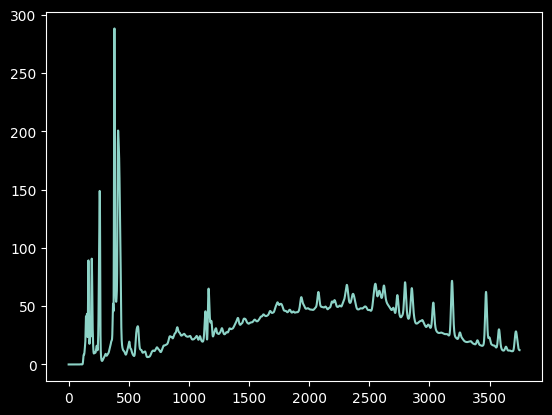

In [ ]:
np_arrays = [df.to_numpy() for df in dfs]
tensor = np.stack(np_arrays)
print(tensor.shape)
plt.plot(tensor[1, :, 33])


In [ ]:
tensor.shape


(11, 3750, 108)

# Running the data

Lets give the data a whirl, now that its tensor-i-fied. I suspect some white wines would be an easier prospect considering the absence of a shifting baseline.

In [ ]:
best_err = np.inf
decomposition = None

true_rank = 30

for run in range(1):
    print(f"Training model {run}...")
    trial_decomposition, trial_errs = tl.decomposition.parafac2(
        tensor,
        true_rank,
        return_errors=True,
        tol=1e-8,
        n_iter_max=1,
        random_state=run,
        verbose=True,
    )
    print(f"Number of iterations: {len(trial_errs)}")
    print(f"Final error: {trial_errs[-1]}")
    if best_err > trial_errs[-1]:
        best_err = trial_errs[-1]
        err = trial_errs
        decomposition = trial_decomposition
    print("-------------------------------")
print(f"Best model error: {best_err}")


Training model 0...
Starting iteration 0
reconstruction error=0.12796135120926064
iteration 1, reconstruction error: 0.05133595095313799, decrease = 0.07662540025612265, unnormalized = 21519.15551165553
iteration 2, reconstruction error: 0.03560037161866579, decrease = 0.0157355793344722, unnormalized = 14923.068900274626
iteration 3, reconstruction error: 0.03183948750121108, decrease = 0.0037608841174547117, unnormalized = 13346.570390318098
iteration 4, reconstruction error: 0.02929619498388314, decrease = 0.00254329251732794, unnormalized = 12280.465522757166
PARAFAC2 reconstruction error=0.029297042154387106
Number of iterations: 1
Final error: 0.029297042154387106
-------------------------------
Best model error: 0.029297042154387106


In [ ]:
decomposition


(weights, factors, projections) : rank-30 Parafac2Tensor of shape ((3750, 108), (3750, 108), (3750, 108), (3750, 108), (3750, 108), (3750, 108), (3750, 108), (3750, 108), (3750, 108), (3750, 108), (3750, 108)) 

In [ ]:
tensor[[1]].shape


(1, 3750, 108)

In [ ]:
def fit_parafac_2(tensor, true_rank, **kwargs):
    best_err = np.inf
    decomposition = None

    true_rank = 30

    for run in range(1):
        print(f"Training model {run}...")
        trial_decomposition, trial_errs = tl.decomposition.parafac2(
            tensor,
            true_rank,
            return_errors=True,
            tol=1e-8,
            n_iter_max=1,
            random_state=run,
            verbose=True,
            linesearch=False,
            **kwargs,
        )
        print(f"Number of iterations: {len(trial_errs)}")
        print(f"Final error: {trial_errs[-1]}")
        if best_err > trial_errs[-1]:
            best_err = trial_errs[-1]
            decomposition = trial_decomposition
        print("-------------------------------")
    print(f"Best model error: {best_err}")

    est_tensor = tl.parafac2_tensor.parafac2_to_tensor(decomposition)
    est_weights, (est_A, est_B, est_C) = tl.parafac2_tensor.apply_parafac2_projections(
        decomposition
    )

    return decomposition, est_tensor, est_weights, est_A, est_B, est_C


decomposition, est_tensor, est_weights, est_A, est_B, est_C = fit_parafac_2(
    tensor=tensor[[1]], true_rank=30, nn_modes="all"
)


Training model 0...
Starting iteration 0
reconstruction error=0.06552301451210976
iteration 1, reconstruction error: 0.018164923832376733, decrease = 0.047358090679733025
iteration 2, reconstruction error: 0.013521054236034941, decrease = 0.004643869596341792
iteration 3, reconstruction error: 0.012566891201882282, decrease = 0.0009541630341526591
iteration 4, reconstruction error: 0.012182021200914111, decrease = 0.0003848700009681707
PARAFAC2 reconstruction error=0.012185960310829597
Number of iterations: 1
Final error: 0.012185960310829597
-------------------------------
Best model error: 0.012185960310829597


In [ ]:
decomposition.projections


[array([[-0.01150803, -0.00197799,  0.01348456, ..., -0.0075337 ,
         -0.03245334,  0.01451348],
        [-0.01139801, -0.00221163,  0.01344984, ..., -0.00744503,
         -0.03233171,  0.01476975],
        [-0.01130265, -0.00232514,  0.01344605, ..., -0.00737663,
         -0.03226731,  0.01493234],
        ...,
        [ 0.02206099, -0.01587706,  0.01604883, ...,  0.00176416,
          0.00374713, -0.00027835],
        [ 0.02203062, -0.01598668,  0.0160931 , ...,  0.00181697,
          0.00385265, -0.00025115],
        [ 0.02193082, -0.01610334,  0.01624793, ...,  0.00189838,
          0.00392868, -0.00027701]])]

(3750, 30)
(3750,)


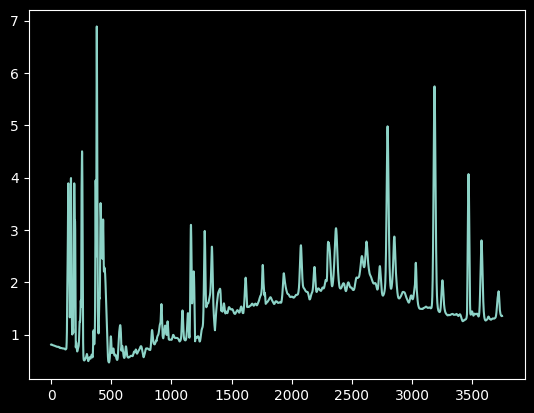

In [ ]:
sample = 0

print(est_B[sample].shape)
x = np.sum(np.abs(est_B[sample]), axis=1)
print(x.shape)
plt.plot(x);


In [ ]:
tensor_diff = tensor[[1]] - est_tensor
tensor_diff / tensor[[1]]


array([[[ 9.76040027e-01, -1.62197608e+01,  9.51370713e-01, ...,
         -9.23976373e+00, -6.33558895e+00,  8.95227706e-01],
        [ 9.76299018e-01, -1.43723941e+00,  8.52454346e-01, ...,
         -1.02993127e+01, -8.26188863e+00, -9.59770598e-01],
        [ 9.76483898e-01, -1.49802960e-01,  8.39813347e-01, ...,
         -1.10674721e+01, -1.05963901e+01, -2.95152738e+00],
        ...,
        [ 2.39692708e-01,  1.84133089e-01,  9.99402345e-04, ...,
         -4.92092670e-01, -4.41375877e-01, -4.55548719e-01],
        [ 2.40367762e-01,  1.84090024e-01,  1.00924966e-03, ...,
         -4.95703558e-01, -4.44699207e-01, -4.57494321e-01],
        [ 2.40606161e-01,  1.84100392e-01,  1.01196217e-03, ...,
         -4.98293315e-01, -4.47112981e-01, -4.58683963e-01]]])

(3750,)


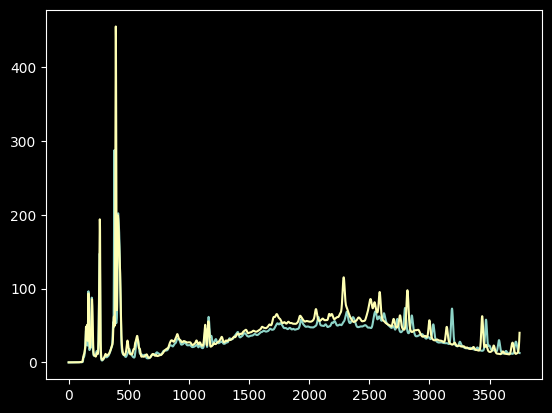

In [ ]:
x = est_tensor[0, :, 33]
print(x.shape)
plt.plot(x)
plt.plot(tensor[0, :, 33])


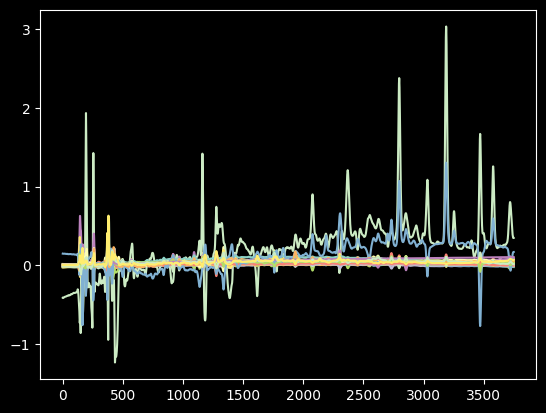

In [ ]:
plt.plot(est_B[0]);
